## Exploratory Data Analysis

In [69]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Load the dataset
df = pd.read_csv('/Users/gurjitsingh/Desktop/MS Data Science/MS_Project_Python/fully_imputed.csv')
df.head()

,area,year,item,export_quantity,export_value,import_quantity,import_value,area_harvested,production,yield,...,least_developed_country,land_locked_developing_country,small_island_developing_state,low_income_food_deficit_country,net_food_importing_developing_country,temp_change_meteorological_year,temp_change_dec_jan_feb,temp_change_jun_jul_aug,temp_change_sep_oct_nov,temp_change_mar_apr_may
0,Afghanistan,2001,"Almonds, in shell",10900.0,3000.0,10.877912,10.261501,9000.0,15000.00,1666.7,...,1.0,1.0,0.0,1.0,1.0,1.377,0.433,1.090,1.209,2.778
1,Afghanistan,2002,"Almonds, in shell",7355.0,2041.0,12.133391,13.651945,5500.0,11773.99,2140.7,...,1.0,1.0,0.0,1.0,1.0,1.457,1.722,0.991,1.589,1.524
2,Afghanistan,2003,"Almonds, in shell",7395.0,3219.0,9.425356,12.950618,5700.0,14000.00,2456.1,...,1.0,1.0,0.0,1.0,1.0,0.710,1.105,0.947,0.787,0.002
3,Afghanistan,2004,"Almonds, in shell",6163.0,3342.0,10.303944,14.898475,12000.0,14700.00,1225.0,...,1.0,1.0,0.0,1.0,1.0,1.482,1.959,0.789,1.182,1.999
4,Afghanistan,2005,"Almonds, in shell",4719.0,5888.0,11.206330,18.171417,11768.0,15630.00,1328.1,...,1.0,1.0,0.0,1.0,1.0,0.513,-0.305,0.702,1.306,0.348


In [71]:
# Check the shape (rows, columns)
df.shape

(117207, 103)

In [72]:
# Check number of columns having at least one missing value
df.isna().any().sum()

np.int64(0)

In [73]:
# list of unwanted columns
unwanted_cols = ['area_code_m49', 'area_code', 'year_code']

# drop the unwanted columns from the dataset
df_1 = df.drop(unwanted_cols, axis=1).copy()
df_1.shape

(117207, 100)

In [74]:
df_1.columns

Index(['area', 'year', 'item', 'export_quantity', 'export_value',
       'import_quantity', 'import_value', 'area_harvested', 'production',
       'yield', 'gross_production_index', 'producer_price_index',
       'area_agri_land', 'area_arable_land', 'area_cropland',
       'area_with_irrigation', 'area_permanent_crops', 'area_temporary_crops',
       'value_per_unit_agri_land', 'cropland_area_per_capita',
       'gross_domestic_product', 'gross_fixed_capital_formation',
       'value_added_ag_forest_fish', 'gdp_annual_growth', 'gfcf_annual_growth',
       'value_added_ag_forest_fish_annual_growth', 'gfcf_share_in_total_gdp',
       'ag_forest_fish_share_in_total_gdp', 'total_fdi_inflows',
       'agri_orientation_index_govt_expenditure',
       'govt_expenditure_on_ag_forest_fish', 'total_govt_expenditure',
       'credit_to_ag_forest_fish',
       'credit_to_ag_forest_fish_share_total_credit',
       'aoi_credit_to_ag_forest_fish', 'total_credit',
       'emission_share_farmgate', 'e

### Checking distribution of variables

In [ ]:
# Creating groups of variables for easier visualization
agronomic_vars = [
    'area_agri_land', 'area_arable_land', 'area_cropland', 'area_with_irrigation', 
    'area_permanent_crops', 'area_temporary_crops', 'cropland_area_per_capita', 
    'area_harvested', 'production', 'yield', 'gross_production_index', 
    'producer_price_index', 'value_per_unit_agri_land'
]

agri_trade_vars = [
    'export_quantity', 'export_value', 'import_quantity', 'import_value', 
    'phosphorus_export_quantity', 'phosphorus_import_quantity', 
    'potassium_export_quantity', 'potassium_import_quantity', 
    'nitrogen_export_quantity', 'nitrogen_import_quantity', 
    'total_pesticide_export_quantity', 'total_pesticide_export_value',
    'total_pesticide_import_quantity', 'total_pesticide_import_value'
]

temp_change_vars = [
    'temp_change_meteorological_year', 'temp_change_dec_jan_feb',
    'temp_change_jun_jul_aug', 'temp_change_sep_oct_nov', 'temp_change_mar_apr_may'
]

economic_vars = [
    'gross_domestic_product', 'gross_fixed_capital_formation',
    'value_added_ag_forest_fish', 'gdp_annual_growth', 'gfcf_annual_growth',
    'value_added_ag_forest_fish_annual_growth', 'gfcf_share_in_total_gdp',
    'ag_forest_fish_share_in_total_gdp', 
]

credit_vars = [
    'total_fdi_inflows', 'agri_orientation_index_govt_expenditure',
    'govt_expenditure_on_ag_forest_fish', 'total_govt_expenditure',
    'credit_to_ag_forest_fish', 'credit_to_ag_forest_fish_share_total_credit',
    'aoi_credit_to_ag_forest_fish', 'total_credit'
]

emission_vars = [
    'emission_share_farmgate', 'emission_share_land_use_change',
    'emission_share_pre_and_post_production', 'emission_share_end_to_end_agrifood', 
    'emission_share_crops', 'emission_share_livestock', 
    'emission_share_ipcc_agriculture', 'emission_share_energy_use', 
    'emission_share_agri_waste_mgt'
]

demographic_vars = [
    'value_added_per_worker', 'employment_in_agri',
    'agri_employment_share_in_total_employment', 'total_employment_afs',
    'afs_employment_share_in_total_employment', 'rural_population',
    'urban_population', 'total_population'
]

fertilizer_vars = [
    'nitrogen_agri_use', 'nitrogen_production', 'nitrogen_use_per_area_of_cropland',
    'nitrogen_use_per_capita', 'nitrogen_use_per_value_of_ag_production',
    'phosphorus_agri_use', 'phosphorus_production',
    'phosphorus_use_per_area_of_cropland', 'phosphorus_use_per_capita',
    'phosphorus_use_per_value_of_ag_production', 'potassium_agri_use',
    'potassium_use_per_area_of_cropland', 'potassium_use_per_capita',
    'potassium_use_per_value_of_ag_production',
    'cropland_nitrogen_per_unit_area', 'cropland_nitrogen_use_efficiency',
    'cropland_phosphorus_per_unit_area', 'cropland_phosphorus_use_efficiency',
    'cropland_potassium_per_unit_area', 'cropland_potassium_use_efficiency'
]

pesticide_vars = [
    'total_pesticide_use_for_agriculture',
    'total_pesticide_use_per_area_of_cropland',
    'total_pesticide_use_per_capita',
    'total_pesticide_use_per_value_of_agri_production',
    'total_pesticide_export_quantity', 'total_pesticide_export_value',
    'total_pesticide_import_quantity', 'total_pesticide_import_value'
]

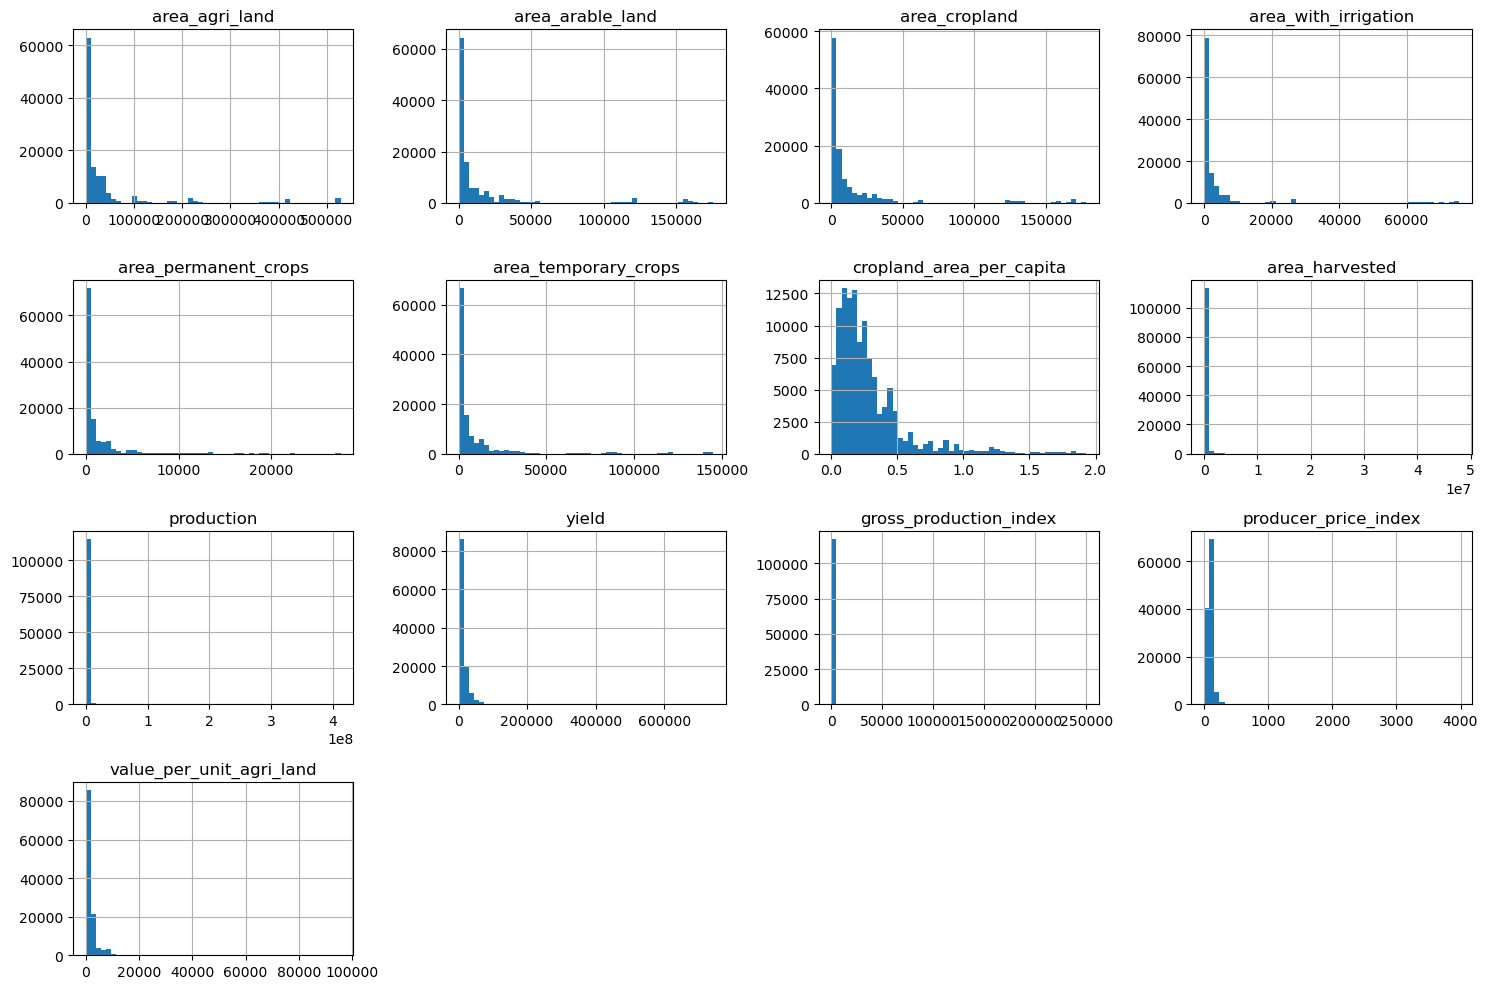

In [ ]:
# Distribution of Agronomic variables
df_1[agronomic_vars].hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

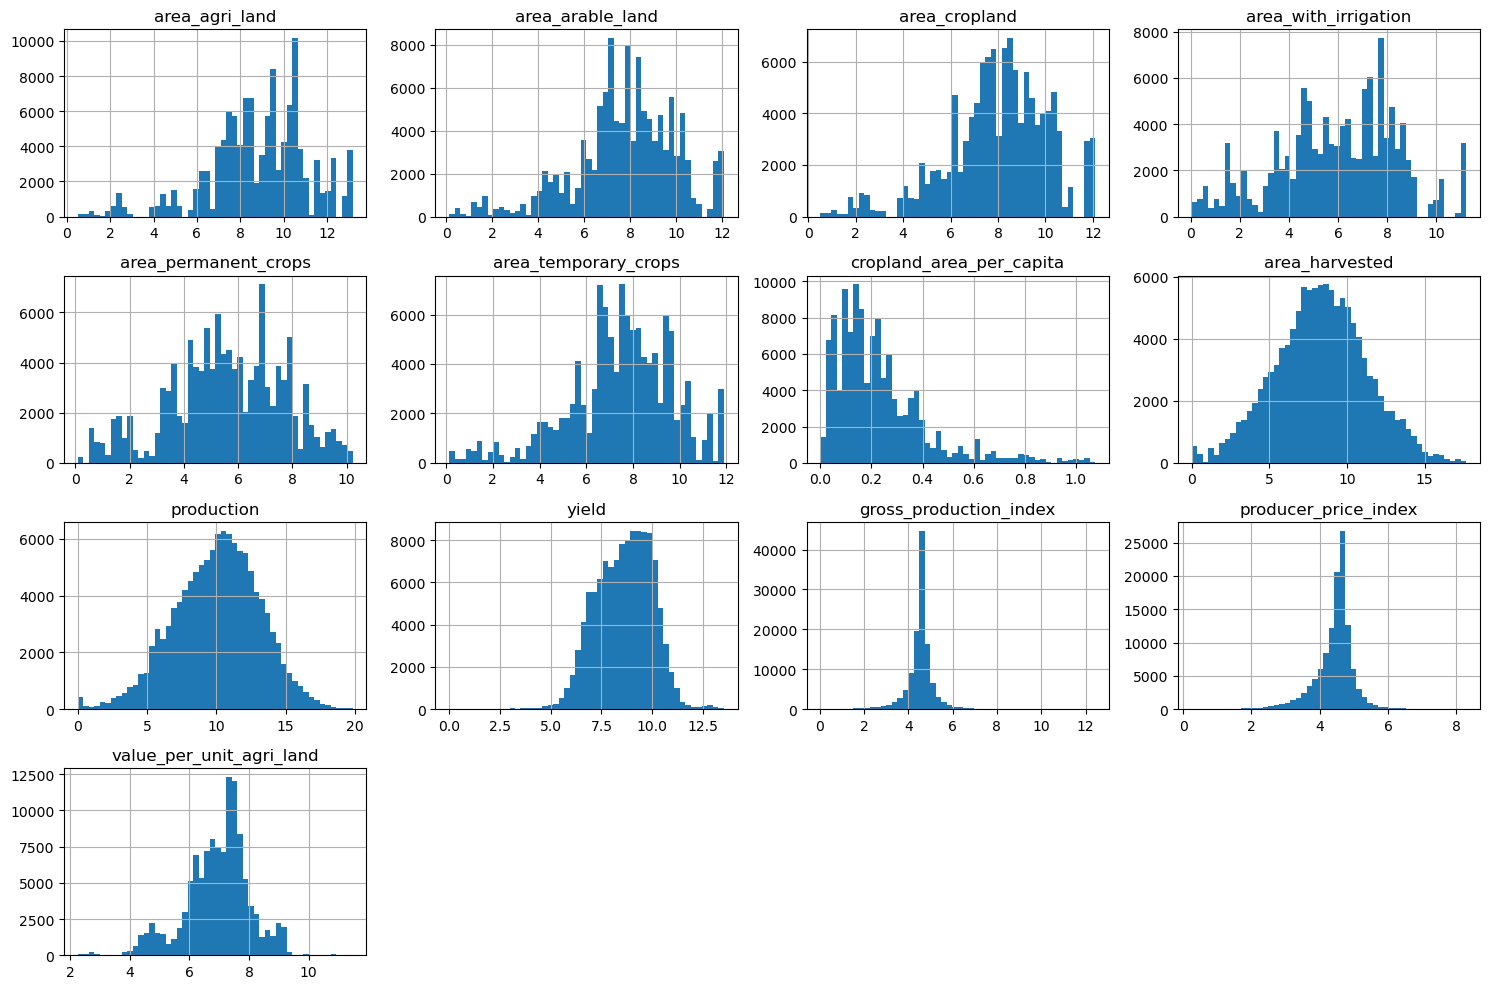

In [ ]:
# Distribution of Agronomic variables (after log(x+1) transformation)
np.log1p(df_1[agronomic_vars]).hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

**Insights from the distribution plots for Agronomic variables:**

- Most agronomic variables exhibit strong right-skewness, indicating that a 
  log(1+x) transformation would be beneficial before applying distance-based 
  models such as linear regression, k-NN, or neural networks. After transformation, 
  the distributions appear much closer to normal, improving model stability and 
  interpretability.

- Extremely high values are present across several variables, likely corresponding 
  to large agricultural economies. This suggests the presence of grouping effects 
  in the data. To mitigate potential bias from these dominant economies, it may 
  be useful to incorporate regional or sub-regional grouping during model training.

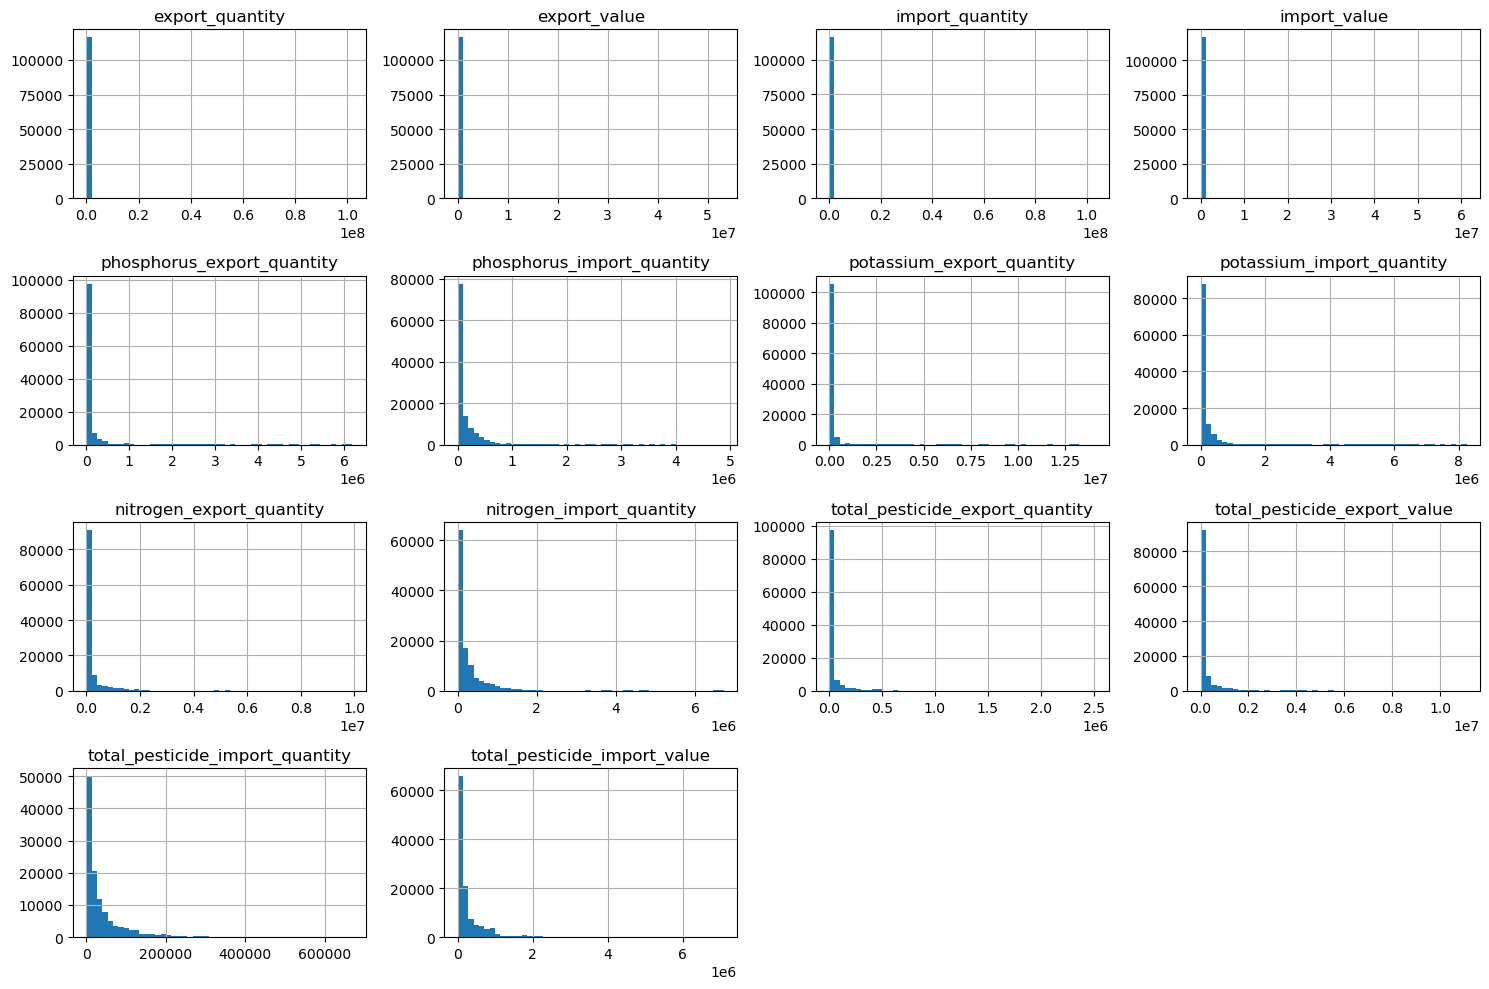

In [80]:
# Distribution of Agricultural-trade variables
df_1[agri_trade_vars].hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

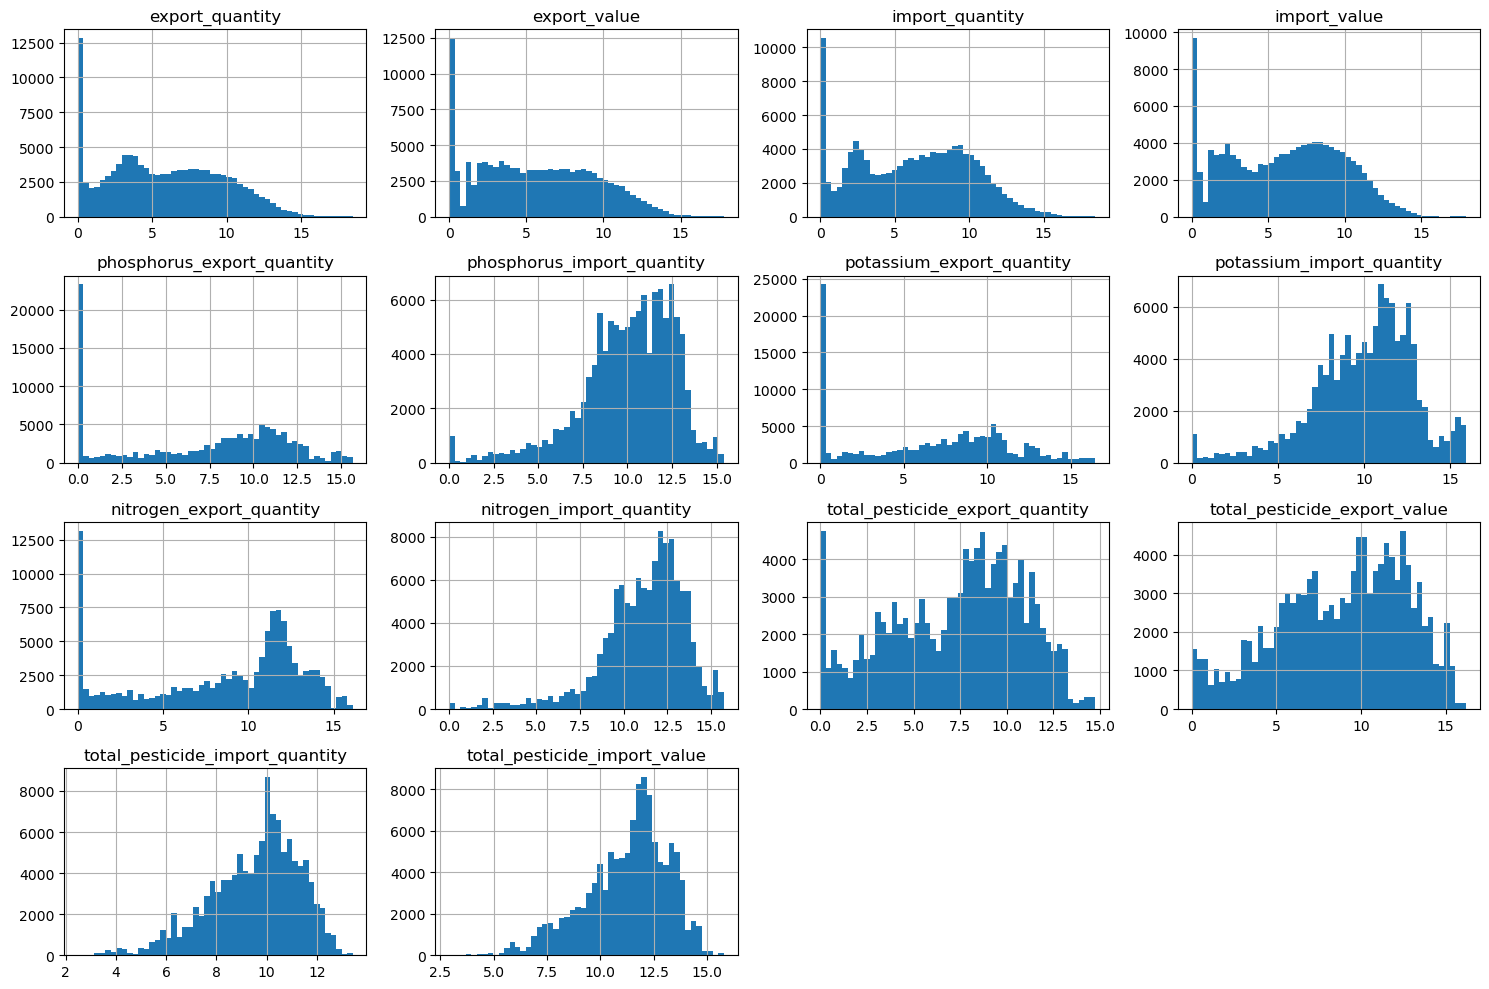

In [81]:
# Distribution of Agricultural-trade variables (after log(1+x) transformation)
np.log1p(df_1[agri_trade_vars]).hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

**Insights from agri-trade variable distributions:**

- All import and export variables exhibit pronounced right-skewness with a large 
  concentration of zero values, indicating that many countries report no trade 
  activity for certain agricultural products. The log(1+x) transformation reduces 
  skewness for the positive values but cannot eliminate the spike at zero, 
  since log(1+0) remains zero. This pattern reflects a genuine structural 
  characteristic of the data rather than noise.

- After transformation, several variables show multimodal patterns, 
  suggesting the presence of distinct economic tiers- non-trading or low-volume 
  economies, mid-level traders, and large agricultural exporters or importers.


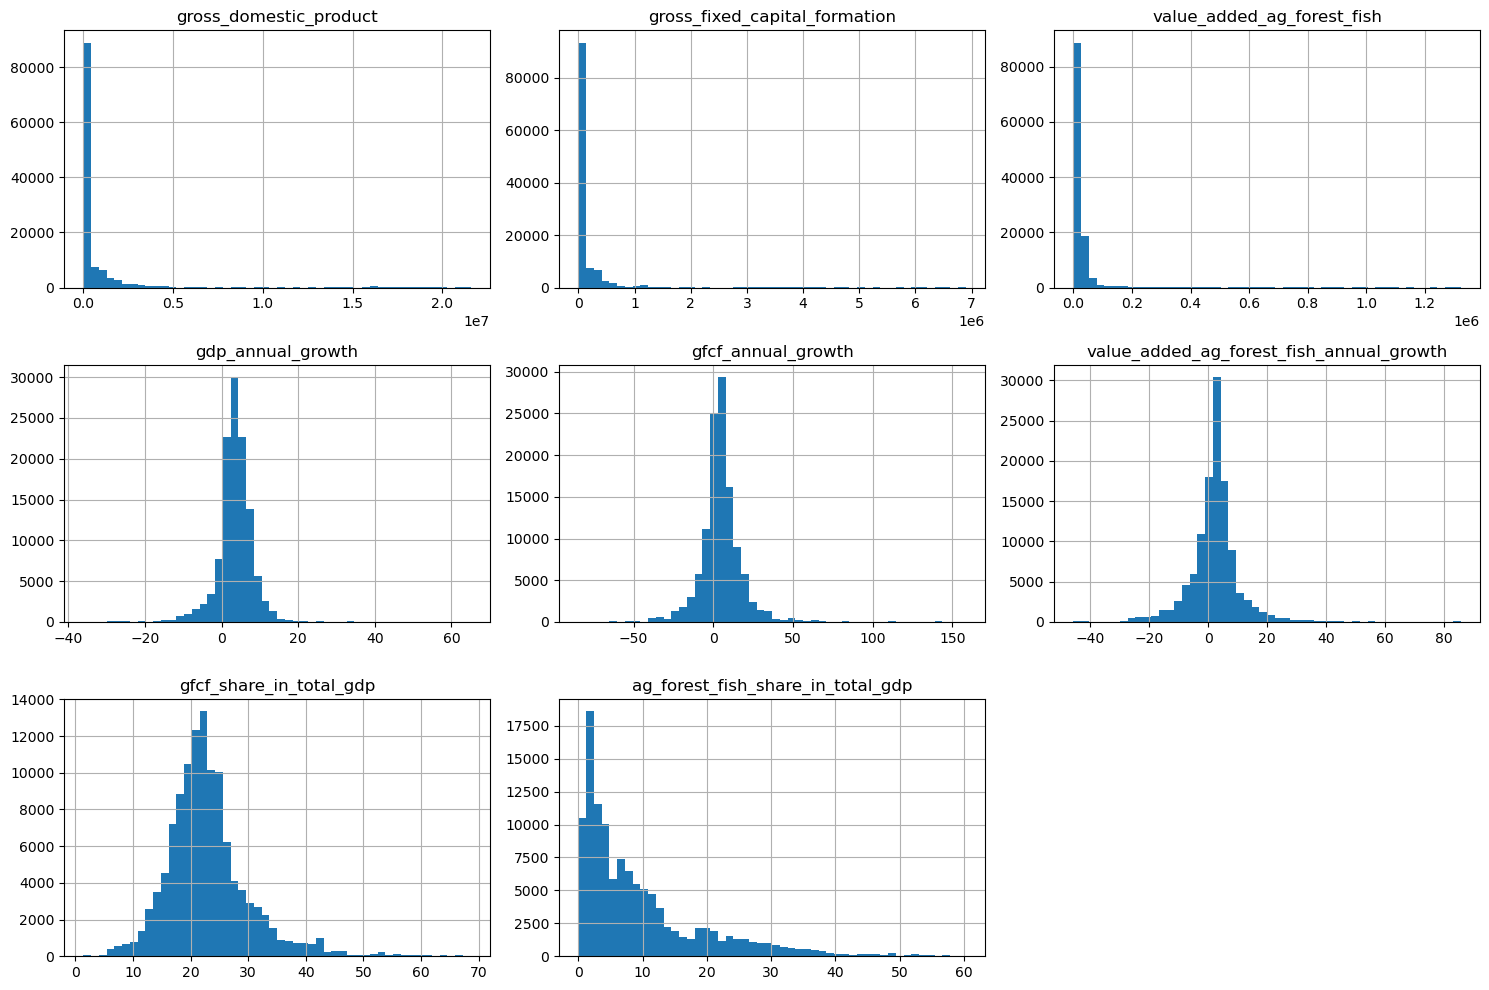

In [82]:
# Distribution of Economic variables
df_1[economic_vars].hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

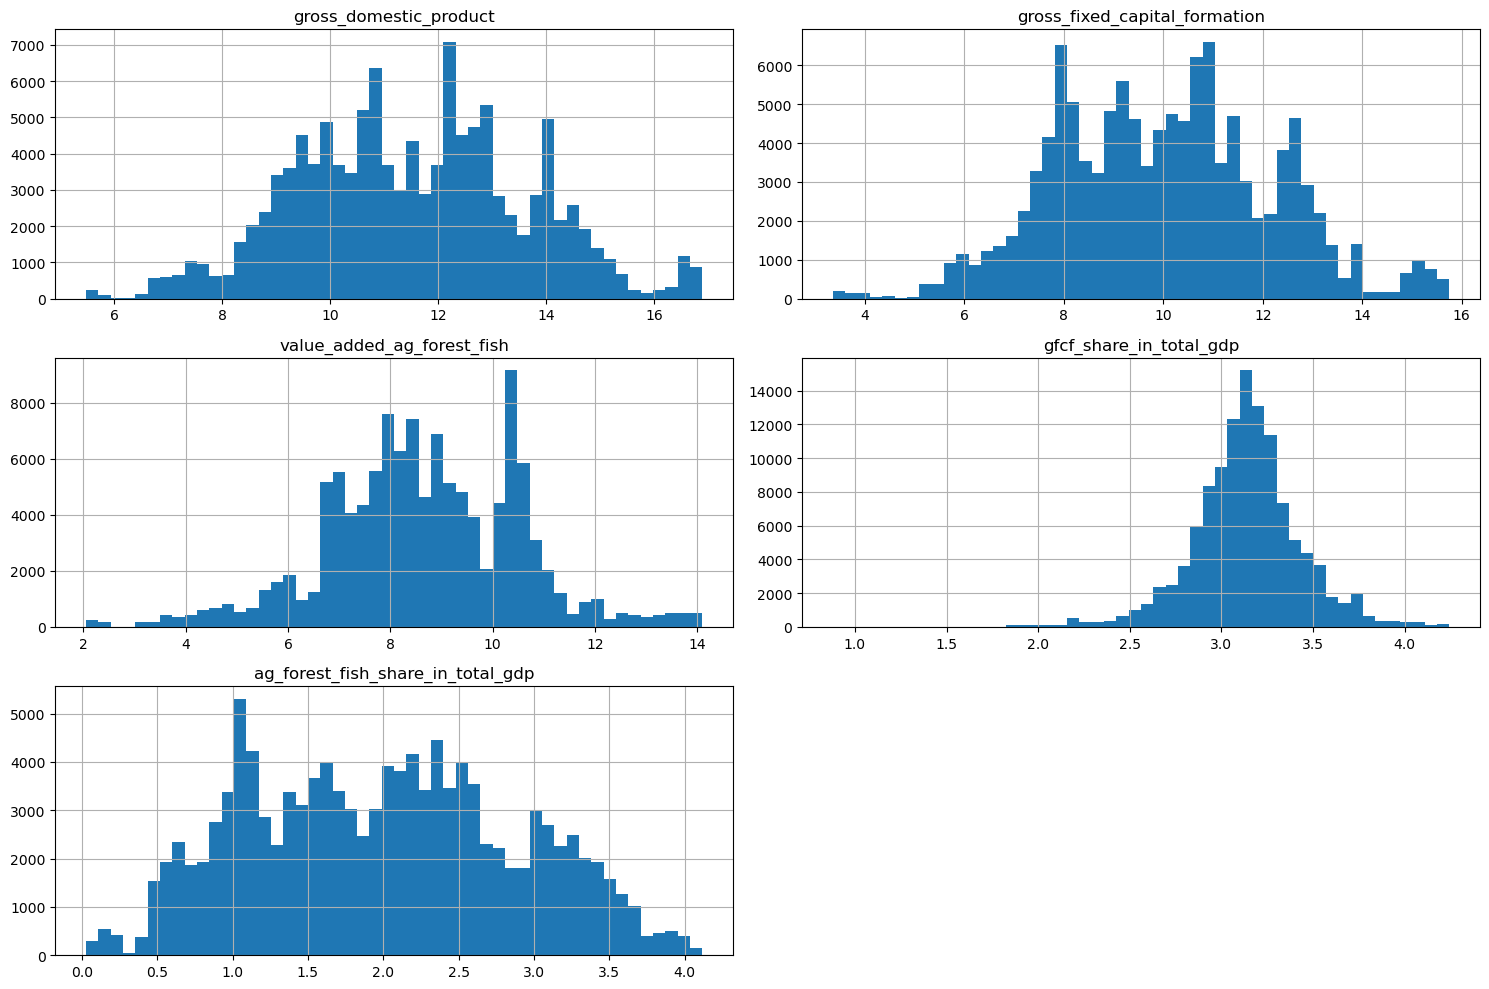

In [86]:
# Distribution of Economic variables (after log(1+x) transformation)
economic_vars_positive = [c for c in economic_vars if min(df_1[c]) >= 0]

np.log1p(df_1[economic_vars_positive]).hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()


**Insights from economic variable distributions:**

- Most macroeconomic indicators (e.g., GDP, gross fixed capital formation, and 
  value added from agriculture, forestry, and fisheries) are heavily right-skewed, 
  reflecting the influence of a few large economies with disproportionately high 
  values. This mirrors global economic inequality and is consistent with patterns 
  seen in the agronomic and trade variables.

- Annual growth variables (GDP, GFCF, and agricultural value-added growth) 
  exhibit approximately normal distributions centered near zero.

- After applying the log(1+x) transformation, the variables become more symmetric 
  but reveal multimodal patterns, suggesting distinct economic clusters-typically 
  large, mid-tier, and smaller economies.

- These observations imply that economic size is a key latent factor influencing 
  variability across features. Accounting for this structure, such as by 
  incorporating region or income group as model features, may help improve model 
  generalization and reduce bias toward dominant economies.

### Correlation of target variable with other numeric variables

In [60]:
# target variable
target = 'producer_price_index'

# Select only numeric columns
numeric_df = df_1.select_dtypes(include=['number'])

# Compute correlations of all numeric columns with the target
corr_with_target = numeric_df.corr()[target].sort_values(ascending=False)

In [ ]:
# top 10 variables that are positively associated with target variable
corr_with_target.head(11)

producer_price_index                 1.000000
year                                 0.425123
temp_change_meteorological_year      0.226684
temp_change_sep_oct_nov              0.206362
temp_change_jun_jul_aug              0.193904
temp_change_dec_jan_feb              0.121951
total_pesticide_import_value         0.108408
total_pesticide_import_quantity      0.100927
temp_change_mar_apr_may              0.096465
nitrogen_use_per_area_of_cropland    0.059131
value_added_per_worker               0.049343
Name: producer_price_index, dtype: float64

In [63]:
# top 10 variables that are negatively associated with the target variable
corr_with_target = numeric_df.corr()[target].sort_values()
corr_with_target.head(11)

agri_employment_share_in_total_employment     -0.092613
afs_employment_share_in_total_employment      -0.086880
ag_forest_fish_share_in_total_gdp             -0.078360
gdp_annual_growth                             -0.076527
gfcf_annual_growth                            -0.072003
credit_to_ag_forest_fish_share_total_credit   -0.045883
value_added_ag_forest_fish_annual_growth      -0.039748
phosphorus_use_per_value_of_ag_production     -0.034963
employment_in_agri                            -0.030082
emission_share_land_use_change                -0.029916
total_employment_afs                          -0.026854
Name: producer_price_index, dtype: float64

In [ ]:
# top 15 variables associated with the target variable by absolute correlation 
# strength
numeric_df.corr()[target].abs().sort_values(ascending=False).head(16)

producer_price_index                         1.000000
year                                         0.425123
temp_change_meteorological_year              0.226684
temp_change_sep_oct_nov                      0.206362
temp_change_jun_jul_aug                      0.193904
temp_change_dec_jan_feb                      0.121951
total_pesticide_import_value                 0.108408
total_pesticide_import_quantity              0.100927
temp_change_mar_apr_may                      0.096465
agri_employment_share_in_total_employment    0.092613
afs_employment_share_in_total_employment     0.086880
ag_forest_fish_share_in_total_gdp            0.078360
gdp_annual_growth                            0.076527
gfcf_annual_growth                           0.072003
nitrogen_use_per_area_of_cropland            0.059131
value_added_per_worker                       0.049343
Name: producer_price_index, dtype: float64

In [68]:
# compute correlation matrix
corr = numeric_df.corr()
labels = corr.columns.to_list()
n = len(labels)

In [ ]:
"""
import required sub-module of matplotlib that provides control over how tick 
marks are placed and formatted. This is important when we have large number of 
features. By default, Matplotlib don't show all the features in plot when there 
are large number of them. 
"""

import matplotlib.ticker as mticker

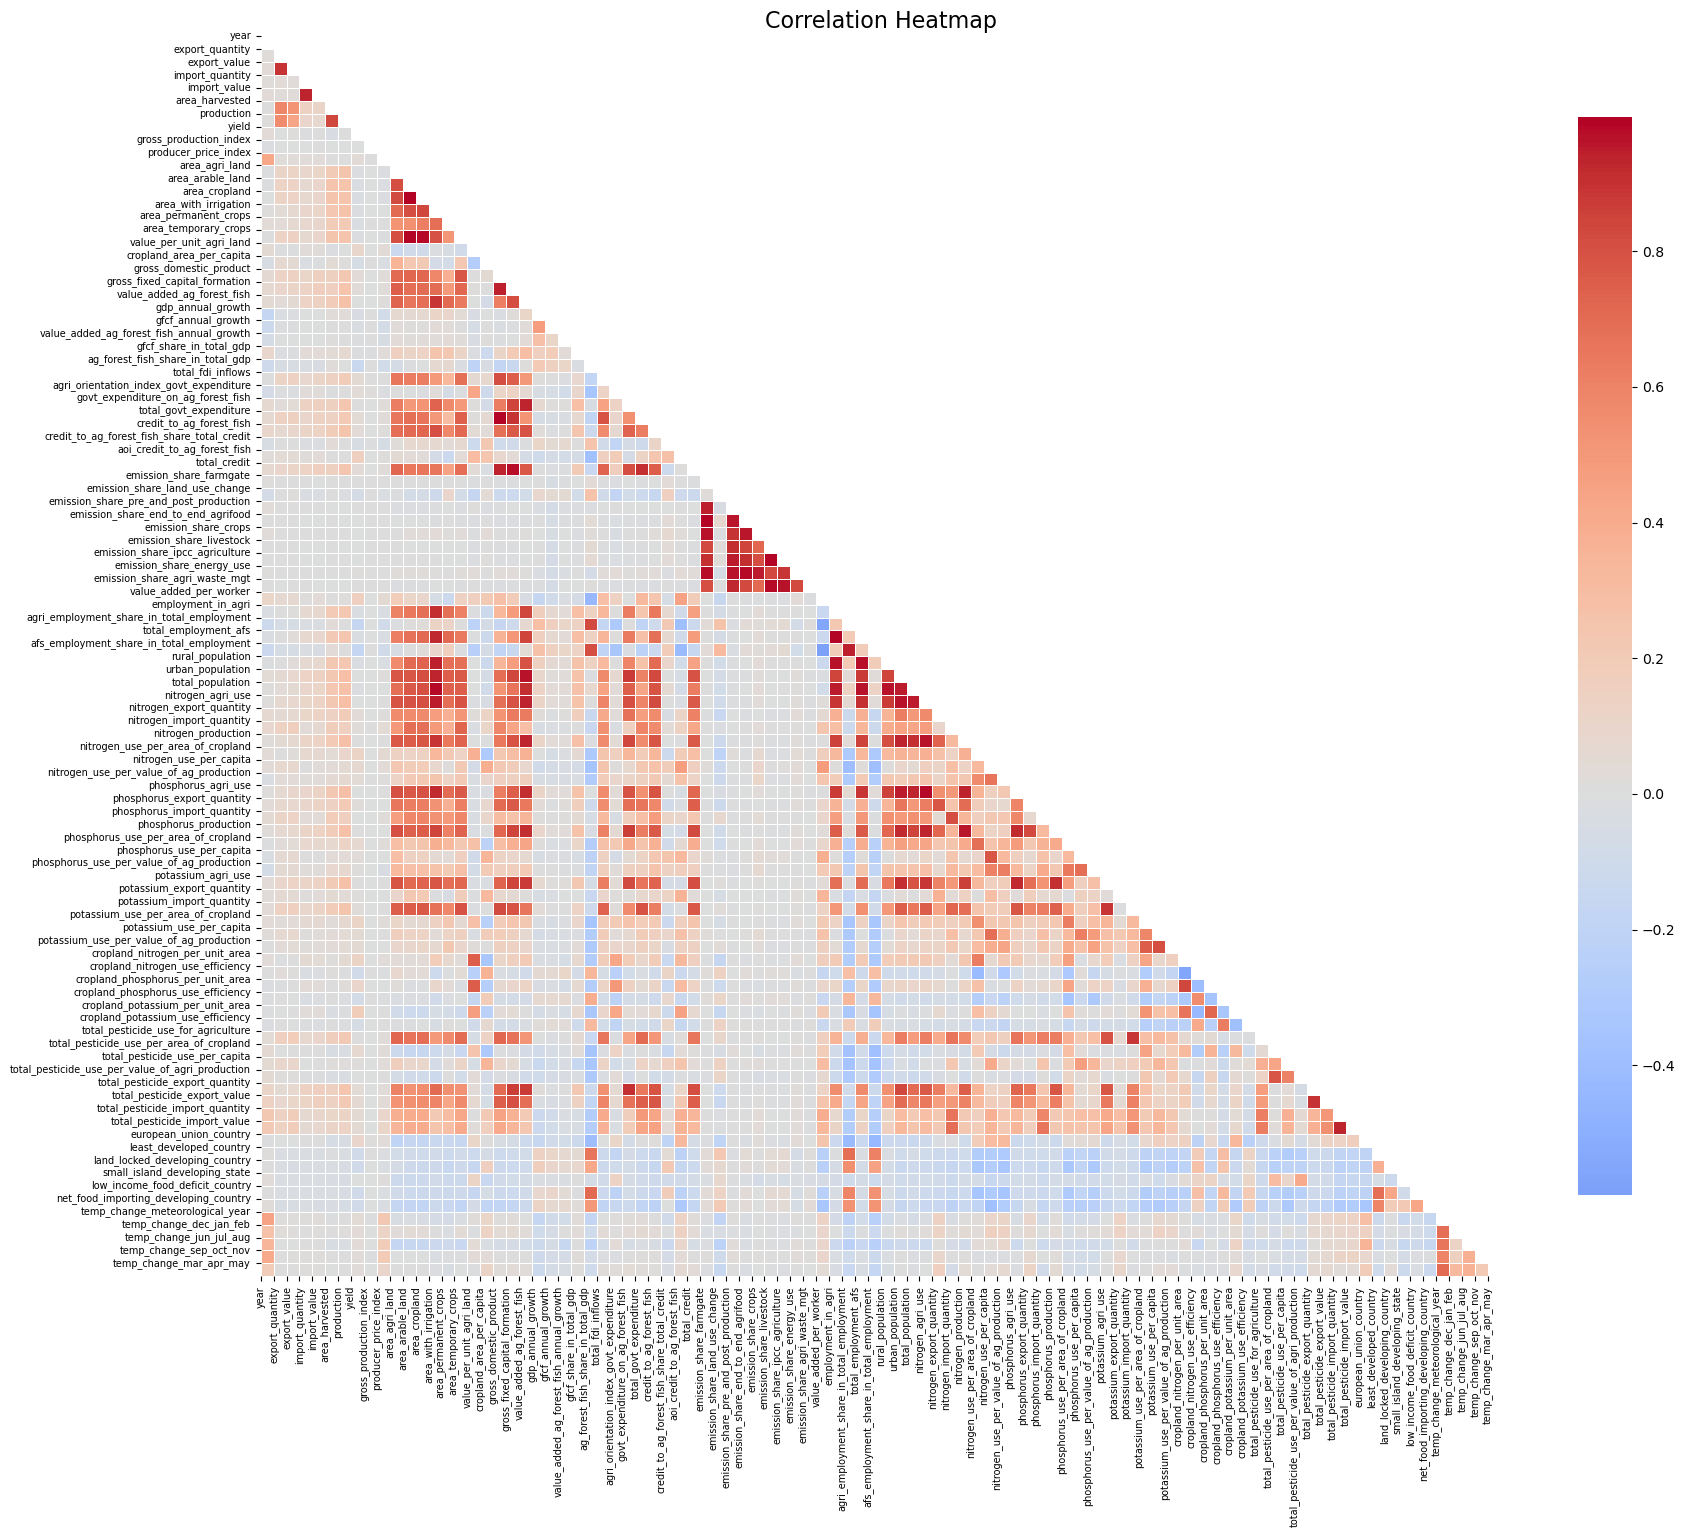

In [ ]:
"""
Heatmap of whole correlation matrix
"""

# create mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20,20))
ax = sns.heatmap(
        corr,
        mask=mask, 
        cmap='coolwarm', 
        center=0,
        square=True, # makes each cell a perfect square
        linewidth=0.5,
        cbar_kws={"shrink": 0.7} # shrinks the color bar to 70% of default size
        )

# Force every tick/label to render
locs = np.arange(n)

# Explicitly sets tick positions on both axes (this prevents Matplotlib from 
# auto-deciding which ticks to skip)
ax.set_xticks(locs)
ax.set_yticks(locs)

# lock tick positions using FixedLocator from matplotlib.ticker
ax.xaxis.set_major_locator(mticker.FixedLocator(locs))
ax.yaxis.set_major_locator(mticker.FixedLocator(locs))
ax.set_xticklabels(labels, rotation=90, ha="center", fontsize=6)
ax.set_yticklabels(labels, fontsize=6)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=7)
plt.savefig('plots/heatmap_full_corr_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

**Correlation heatmaps help us draw two key insights from a dataset:** 

1. *Relationship with the target variable:* 
They reveal how strongly each predictor is associated with the target. Features 
showing high correlation (positive or negative) with the target may serve as 
strong predictors.


2. *Interrelationships among predictors (multicollinearity):* 
They highlight predictors that are highly correlated with one another, suggesting 
redundancy or overlapping information that could affect model stability.

From the correlation heatmap, it is evident that none of the variables exhibit a 
strong association with the target variable. The highest correlation is observed 
for ‘year’ with an absolute value of |r| = 0.43, indicating a moderate relationship 
at best. In addition, several clusters of features show high inter-correlations, 
suggesting the presence of potential multicollinearity within the dataset. 

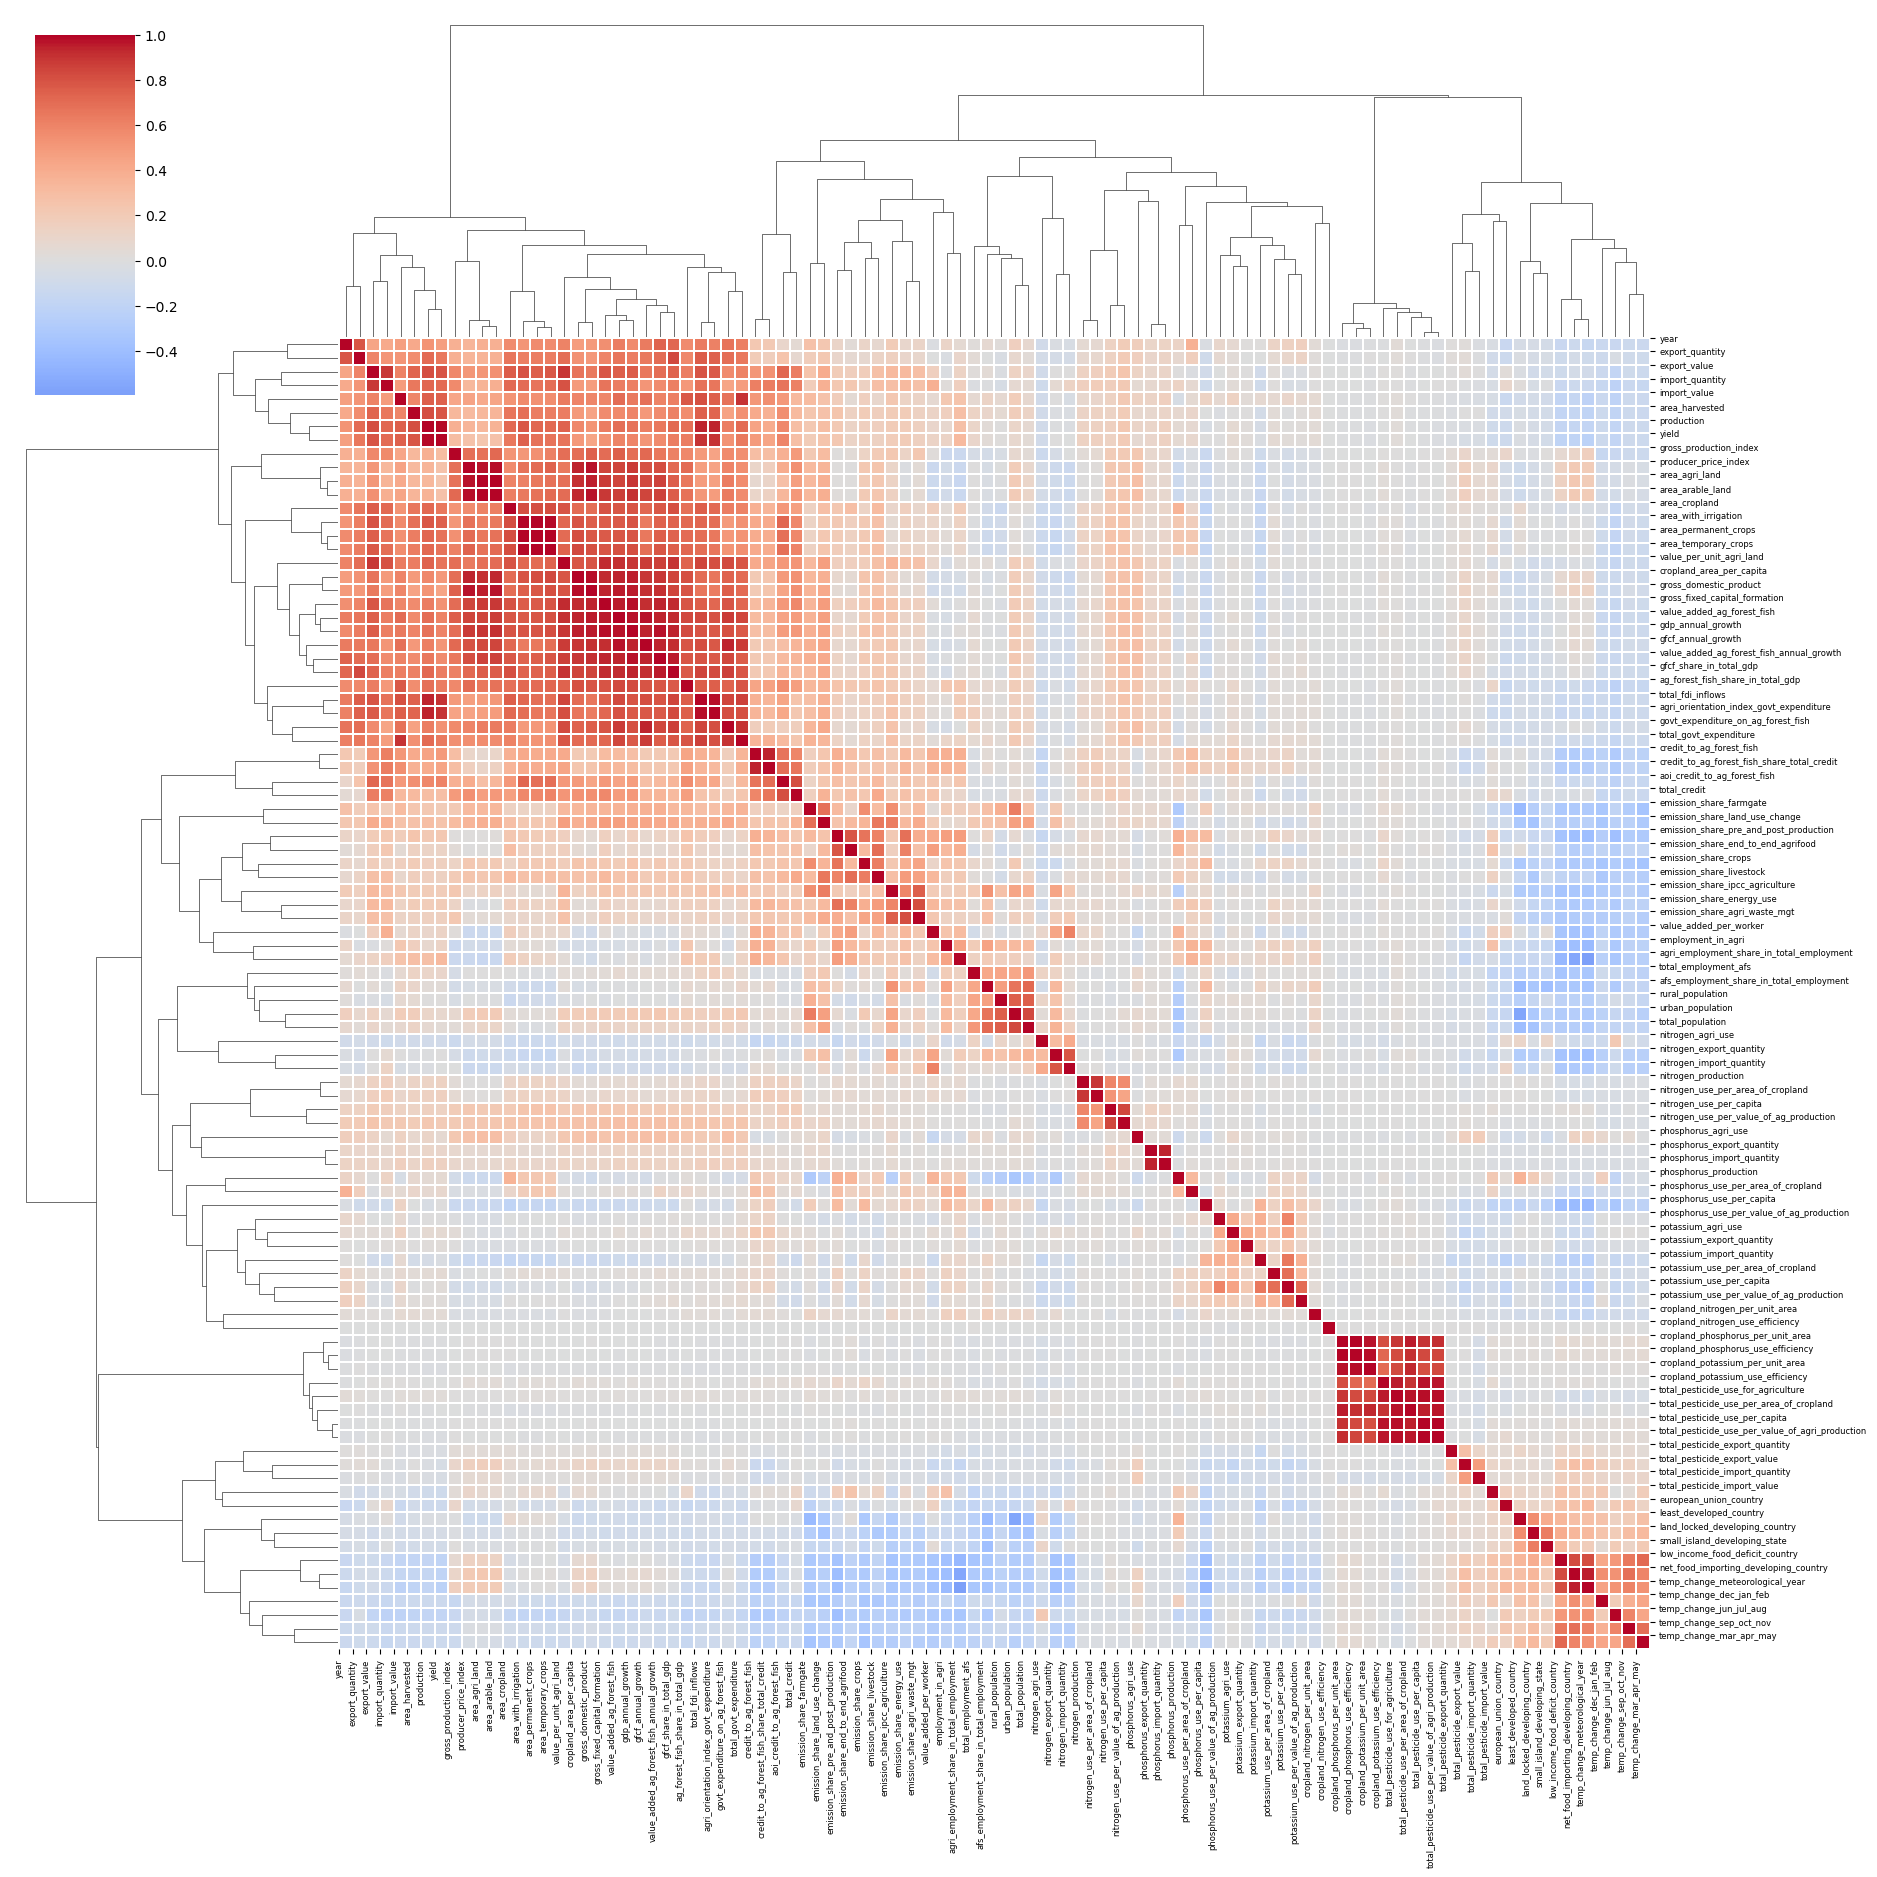

In [ ]:
"""
--- Clustered heatmap of whole correlation matrix ---

It doesn't just plot correlations, it reorders columns using hierarchical 
clustering so that highly correlated variables appear together.

'cg' is the ClusterGrid object which contains multiple subplots: heatmap, 
two dendrograms, and colorbar.

'ax = cg.ax_heatmap' extracts the Axes object corresponding to the actual heatmap 
(excluding the dendrograms).

'matplotlib.ticker.FixedLocator' forces Matplotlib to place ticks exactly at those 
locations (no auto-skipping). By default, Matplotlib skips some labels when 
there are too many to fit.
"""
 
cg = sns.clustermap(
        corr,
        cmap='coolwarm',
        center=0, # ensures 0 is at the center of the color map
        figsize=(20,20),
        linewidths=0.3 # draws faint gridlines between cells
    )

ax = cg.ax_heatmap # extracts the Axes object corresponding to the actual heatmap
ax.xaxis.set_major_locator(mticker.FixedLocator(locs))
ax.yaxis.set_major_locator(mticker.FixedLocator(locs))
ax.set_xticklabels(labels, ha="center", fontsize=6)
ax.set_yticklabels(labels, fontsize=6)

plt.savefig('plots/heatmap_full_corr_clustermap.png', dpi=300, bbox_inches='tight')
plt.show()


From the correlation heatmap and clustermap, it is clear that there is potential
multi-collinearity present among the predictor variables, which we would have to 
handle to remove redundancy and prevent overfitting issues while modelling. Now, 
there are two distinct pathways to follow for feature selection- 

1. **Classical Statistical Feature Selection:** 

- In this, the core idea is to select features based on their individual statistical 
  significance or pairwise correlation with the target variable. Examples include- 
  Stepwise regression, p-values, F-tests, ANOVA, correlation-based filtering.

- The advantage of these procedures is that they are simple to interpret and 
  implement. These provide interpretable metrics (i.e., coefficients, p-values).

- Their disadvantage is that these procedures assume independent predictors with 
  linear relationships. Moreover, these methods fail with strong multicollinearity. 
  These methods ignore non-linear and interaction effects. 

Baseline is- these classical statistical approaches optimizes explanatory power 
at the expense of predictive accuracy. 

2. **Modern Model-Based Feature Selection:**

- In this approach, the core idea is to let the model decide which features 
  improve prediction by minimizing loss under regularization or ensemble averaging. 
  Examples include- LASSO/Ridge/ElasticNet, tree-based models (Random Forest, XGBoost, 
  LightGBM), Recursive Feature Elimination (RFE), Permutation Importance. 

- The advantage of these methods is that- they can handle high dimensional data 
  with multicollinearity and captures non-linear relationships with interactions. 

- However, the disadvantage is that these methods are less interpretable and 
  computationally heavier. 

These methods optimize for predictive accuracy at the expense of interpretability.


